<a href="https://colab.research.google.com/github/maxilexow/ML20241/blob/main/ML_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
# Quito columnas innecesarias
columns_to_drop = ['id', 'Unnamed: 32']
# Drop the columns
df = df.drop(columns=columns_to_drop)

# Transformo el target (diagnosis) en binaria:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
target_column = 'diagnosis'

# Separate features and target
x = df.drop(columns=[target_column])

x_mean = {}
x_se = {}
x_worst = {}

for key, value in x.items():
  if 'mean' in str(key):
    x_mean[key] = x[key]
  elif 'se' in str(key):
    x_se[key] = x[key]
  elif 'worst' in str(key):
    x_worst[key] = x[key]

x_mean = pd.DataFrame.from_dict(x_mean)
x_se = pd.DataFrame.from_dict(x_se)
x_worst = pd.DataFrame.from_dict(x_worst)


y = df[target_column]


In [ ]:
# Compute correlation of every column with the target column
correlation_of_means_with_target = x_mean.corrwith(y)
correlation_of_se_with_target = x_se.corrwith(y)
correlation_of_worst_with_target = x_worst.corrwith(y)

# Display correlation matrix
print(correlation_of_means_with_target)
print(correlation_of_se_with_target)
print(correlation_of_worst_with_target)

#threshold
threshold = 0.1

# Identify columns to drop for each group
columns_to_drop_mean = correlation_of_means_with_target[abs(correlation_of_means_with_target) < threshold].index.tolist()
columns_to_drop_se = correlation_of_se_with_target[abs(correlation_of_se_with_target) < threshold].index.tolist()
columns_to_drop_worst = correlation_of_worst_with_target[abs(correlation_of_worst_with_target) < threshold].index.tolist()

# Drop low-correlation columns
df = df.drop(columns=columns_to_drop_mean + columns_to_drop_se + columns_to_drop_worst)
print(f"Dropped mean columns: {columns_to_drop_mean}")
print(f"Dropped SE columns: {columns_to_drop_se}")
print(f"Dropped worst columns: {columns_to_drop_worst}")

radius_mean               0.730029
texture_mean              0.415185
perimeter_mean            0.742636
area_mean                 0.708984
smoothness_mean           0.358560
compactness_mean          0.596534
concavity_mean            0.696360
concave points_mean       0.776614
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
dtype: float64
radius_se               0.567134
texture_se             -0.008303
perimeter_se            0.556141
area_se                 0.548236
smoothness_se          -0.067016
compactness_se          0.292999
concavity_se            0.253730
concave points_se       0.408042
symmetry_se            -0.006522
fractal_dimension_se    0.077972
dtype: float64
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
sy

In [ ]:
mean_columns = [col for col in df.columns if '_mean' in col]
df = df[['diagnosis'] + mean_columns]  # Include the target column

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Entrenamiento del modelo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Make Predictions

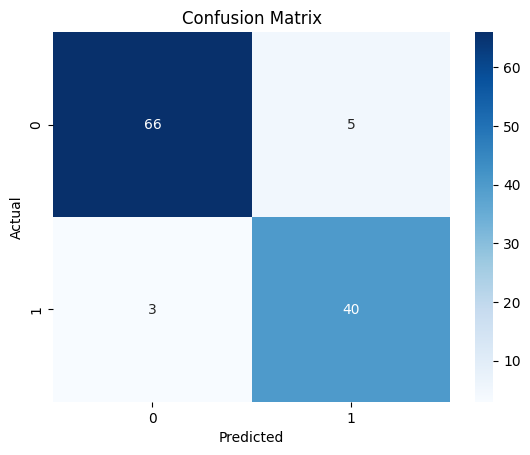

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy: 0.9298245614035088
ROC-AUC Score: 0.9888634130363576


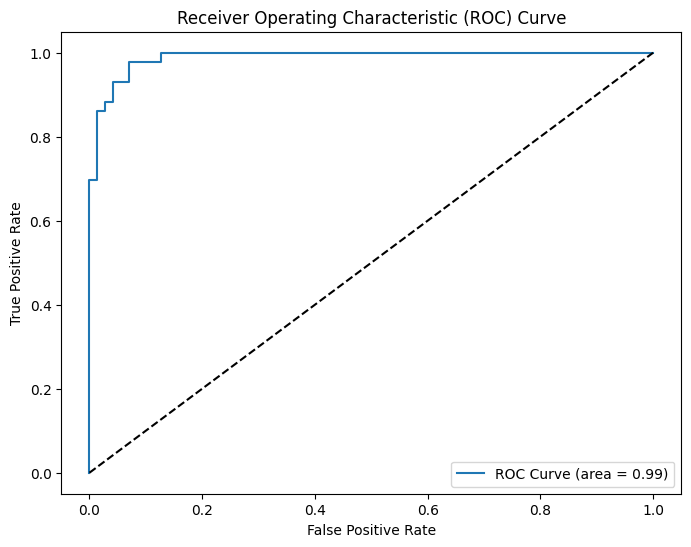

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()